# Example 103 "Zweibock" (with imperfection)

This model contains two trusses and three nodes. The left and right end nodes are fixed, whereas on the top middle node a reference force is applied in negative z-direction. A second version contains 2 DOF (x,z at node 2) with a geometric imperfection at node 2. The model may be generated with the following code and is shown in the undeformed state.

[![MyBinder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/adtzlr/trusspy/main?labpath=docs%2Fexamples%2Fe103%2Fe103.ipynb)
[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adtzlr/trusspy/blob/main/docs/examples/e103/e103.ipynb)

In [ ]:
!pip install trusspy

In [ ]:
import trusspy as tp

M1 = tp.Model(logfile=False)

with M1.Nodes as MN:
    MN.add_node(1, coord=(0, 0, 0))
    MN.add_node(2, coord=(1, 0, 3))
    MN.add_node(3, coord=(2, 0, 0))

with M1.Elements as ME:
    ME.add_element(1, conn=(1, 2), gprop=[1])
    ME.add_element(2, conn=(2, 3), gprop=[1])

    E = 1  # elastic modulus
    ME.assign_material("all", [E])

with M1.Boundaries as MB:
    MB.add_bound_U(1, (0, 0, 0))
    MB.add_bound_U(2, (0, 0, 1))
    MB.add_bound_U(3, (0, 0, 0))

with M1.ExtForces as MF:
    MF.add_force(2, (0, 0, -1))

M1.Settings.incs = 150
M1.Settings.du = 0.01
M1.Settings.dlpf = 0.01
M1.Settings.xlimit = (1, 10)
M1.Settings.dlpf
M1.Settings.stepcontrol = True
M1.Settings.maxfac = 10

The calculation of the deformation process is started by calling the `build()` and `run()` methods.


# Model Summary
Analysis Dimension      "ndim": 3
Number of Nodes       "nnodes": 3
Number of Elements    "nelems": 2
 
System DOF              "ndof": 9
active DOF             "ndof1": 1
locked DOF             "ndof2": 8
 
active DOF          "nproDOF1": [5]
fixed  DOF          "nproDOF0": [0 1 2 3 4 6 7 8]


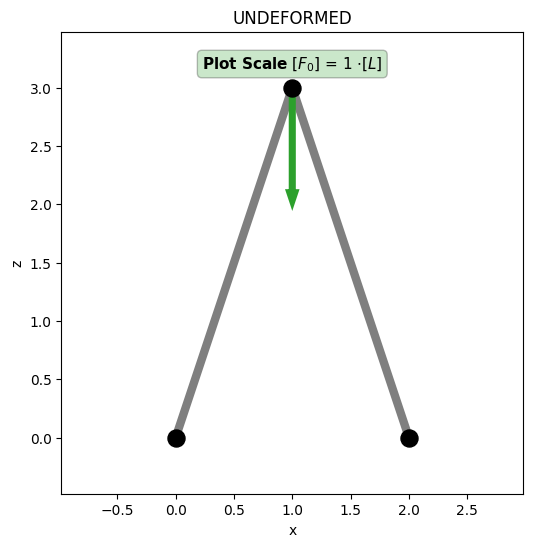

In [2]:
M1.build()
fig, ax = M1.plot_model(inc=0)

In [ ]:
M1.run()

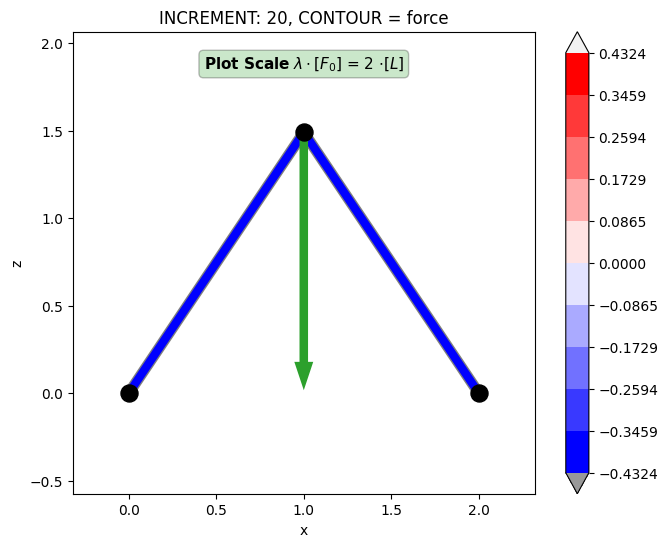

In [4]:
fig, ax = M1.plot_model(view="xz", contour="force", force_scale=2, inc=20)

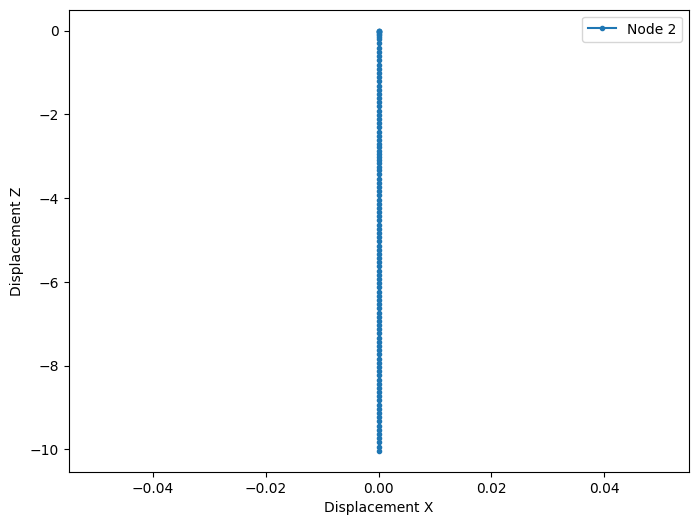

In [5]:
fig1, ax1 = M1.plot_history(nodes=[2, 2], X="Displacement X", Y="Displacement Z")

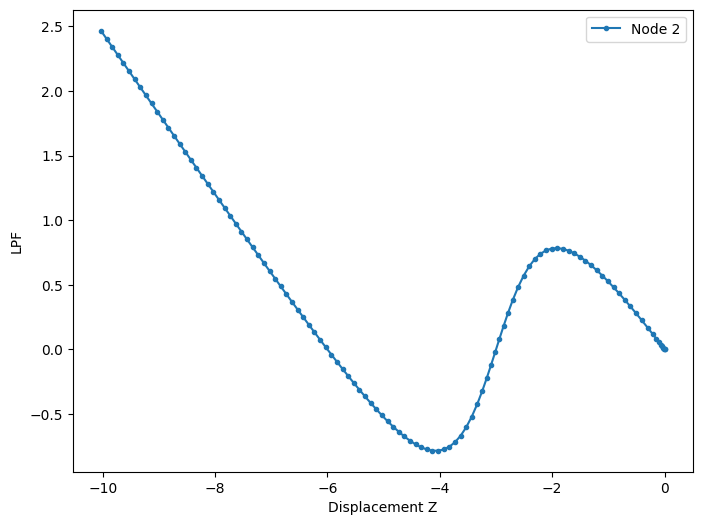

In [6]:
fig2, ax2 = M1.plot_history(nodes=[2, 2], X="Displacement Z", Y="LPF")

## Geometric imperfection

Let's re-run the model with a geometric imperfection at node 2 (misalignment `dx=0.1`). Results are plotted for Node 2 as a History Plot of z-displacement vs. LPF and x-displacement vs. z-displacement.

In [ ]:
M2 = tp.Model(logfile=False)

with M2.Nodes as MN:
    MN.add_node(1, coord=(0, 0, 0))
    MN.add_node(2, coord=(1.1, 0, 3))
    MN.add_node(3, coord=(2, 0, 0))

with M2.Elements as ME:
    ME.add_element(1, conn=(1, 2), gprop=[1])
    ME.add_element(2, conn=(2, 3), gprop=[1])

    E = 1  # elastic modulus
    ME.assign_material("all", [E])

with M2.Boundaries as MB:
    MB.add_bound_U(1, (0, 0, 0))
    MB.add_bound_U(2, (1, 0, 1))
    MB.add_bound_U(3, (0, 0, 0))

with M2.ExtForces as MF:
    MF.add_force(2, (0, 0, -1))

M2.Settings.incs = 150
M2.Settings.du = 0.01
M2.Settings.dlpf = 0.01
M2.Settings.xlimit = (2, 10)
M2.Settings.dlpf
M2.Settings.stepcontrol = True
M2.Settings.maxfac = 10

In [ ]:
M2.build()
M2.run()

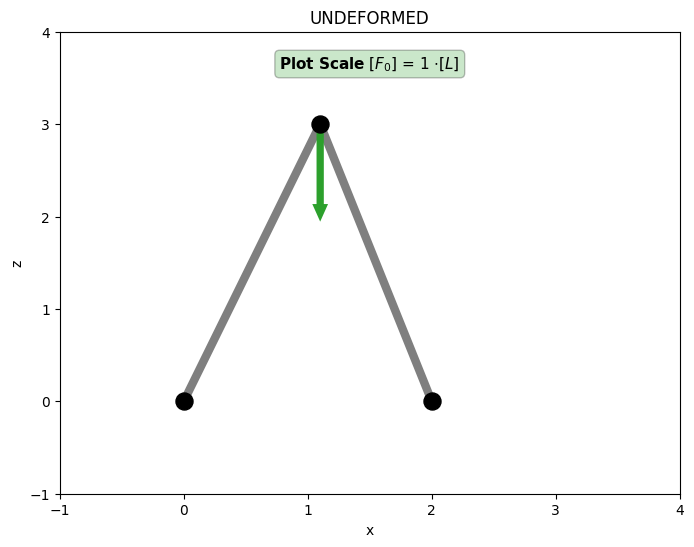

In [9]:
fig, ax = M2.plot_model(lim_scale=(-1, 4, -1, 4), inc=0)

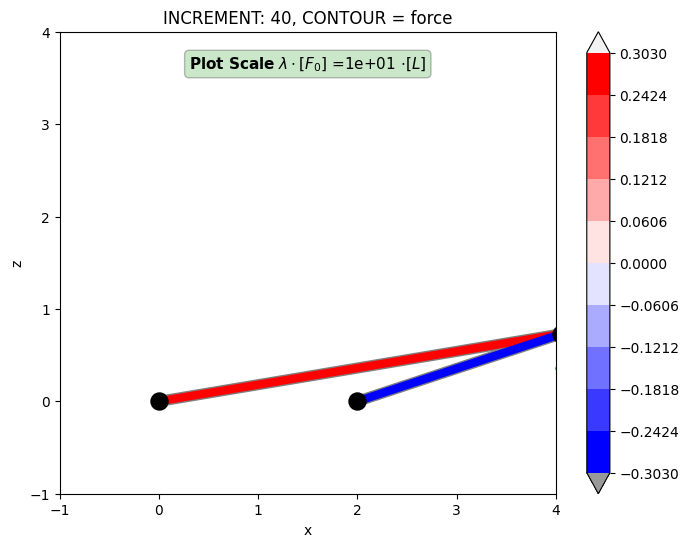

In [10]:
fig, ax = M2.plot_model(
    view="xz", contour="force", lim_scale=(-1, 4, -1, 4), force_scale=10, inc=40
)

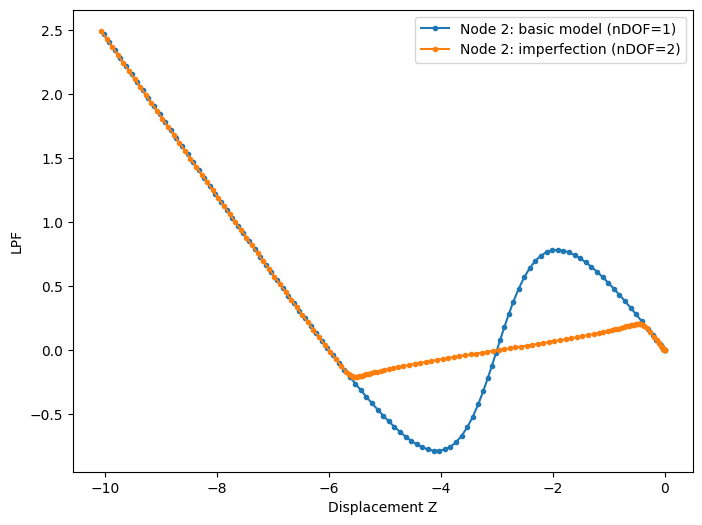

<Figure size 800x600 with 0 Axes>

In [11]:
fig2, ax2 = M2.plot_history(nodes=[2, 2], X="Displacement Z", Y="LPF", fig=fig2, ax=ax2)
ax2.legend(["Node 2: basic model (nDOF=1)", "Node 2: imperfection (nDOF=2)"])
fig2

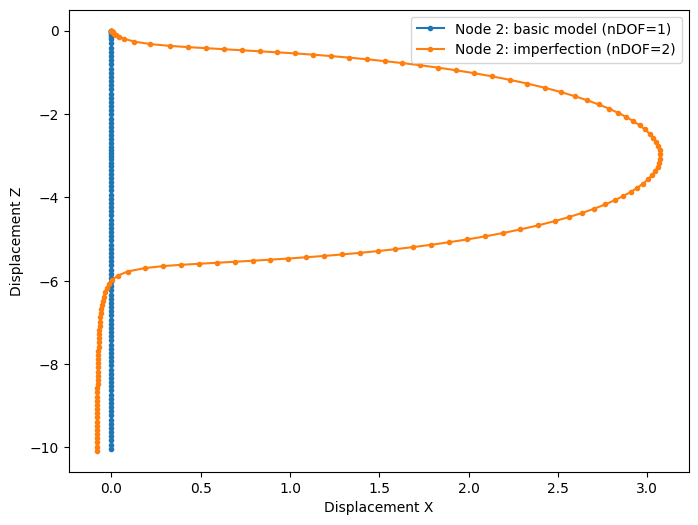

<Figure size 800x600 with 0 Axes>

In [12]:
fig1, ax1 = M2.plot_history(
    nodes=[2, 2], X="Displacement X", Y="Displacement Z", fig=fig1, ax=ax1
)
ax1.legend(["Node 2: basic model (nDOF=1)", "Node 2: imperfection (nDOF=2)"])
fig1

In [13]:
M2.plot_movie(view="xz", contour="force", lim_scale=(-1, 4, -1, 4), force_scale=10)

![Movie](figures/gif/movie.gif)